# Data Homework: Chapter 13 (Mankiw)

Name:<u>Enter your full name here

Download the following data from [FRED](https://fred.stlouisfed.org/graph/?g=pUBj) using pandas_datareader.

>Real Imports: IMPGSC1
>
>Real Exports: EXPGSC1
>
>Real GDP: GDPC1
>
>Real Trade Weighted Dollar: TWEXBPA

In [1]:
import datetime
from datlib.plots import *
from datlib.FRED import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 40})

#Import monetary base
# {data_name1:data_code1,
#  data_name2:data_code2}
data_codes  = {"Real Imports": "IMPGSC1",
               "Real Exports": "EXPGSC1",
               "Real GDP": "GDPC1",
               "Real Trade Weighted Dollar": "TWEXBPA"}
# Select start and end dates
start = datetime.datetime(1947, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, 
                   start = start, 
                   end = end, 
                   freq = "Q")
data.to_csv("Ch13HWData.csv")

1.	Generate logged values for each variable. Plot each of these logged variables together on the same plot.

In [2]:
keys = list(data.keys())
for key, val in data.items():
    data["Log " + key] = np.log(val)
data["Net Real Exports"] = data["Real Exports"].sub(data["Real Imports"])

# Calculate percent change in Net Importants since negative values cannot be logged
data["Net Real Exports (% Change)"] = data["Net Real Exports"].pct_change(4)

In [3]:
# dropna drops months without values for the trade weighted dollar
data.dropna()

,Real Imports,Real Exports,Real GDP,Real Trade Weighted Dollar,Log Real Imports,Log Real Exports,Log Real GDP,Log Real Trade Weighted Dollar,Net Real Exports,Net Real Exports (% Change)
DATE,,,,,,,,,,
1973-03-31,355.566,248.867,5646.286,103.554200,5.873711,5.516919,8.638753,4.640095,-106.699,-0.065421
1973-06-30,345.318,260.856,5707.755,99.040800,5.844466,5.563969,8.649581,4.595532,-84.462,-0.223259
1973-09-30,335.778,261.735,5677.738,95.825633,5.816450,5.567333,8.644308,4.562530,-74.043,-0.279169
1973-12-31,338.284,274.610,5731.632,97.466267,5.823886,5.615352,8.653756,4.579506,-63.674,-0.410207
1974-03-31,326.810,278.171,5682.353,97.567700,5.789379,5.628236,8.645121,4.580546,-48.639,-0.544148
...,...,...,...,...,...,...,...,...,...,...
2018-12-31,3474.268,2552.437,18733.741,101.633167,8.153139,7.844804,9.838082,4.621370,-921.831,0.131136
2019-03-31,3485.931,2582.285,18835.411,100.525467,8.156490,7.856430,9.843494,4.610411,-903.646,0.093212
2019-06-30,3491.751,2567.281,18962.175,101.161100,8.158159,7.850603,9.850201,4.616714,-924.470,0.131995


2.	Which variables are positively correlated? What might be causing this correlation?

3.	Calculate the annual logged difference for each variable. Plot each pair on a scatter plot.

In [4]:
for key in keys:
    print("Log "+ key)
    log_key = "Log " + key
    data[log_key + " Diff"] = data[log_key].diff(4)

data

Log Real Imports
Log Real Exports
Log Real GDP
Log Real Trade Weighted Dollar


,Real Imports,Real Exports,Real GDP,Real Trade Weighted Dollar,Log Real Imports,Log Real Exports,Log Real GDP,Log Real Trade Weighted Dollar,Net Real Exports,Net Real Exports (% Change),Log Real Imports Diff,Log Real Exports Diff,Log Real GDP Diff,Log Real Trade Weighted Dollar Diff
DATE,,,,,,,,,,,,,,
1947-03-31,60.396,97.630,2034.450,NaN,4.100923,4.581185,7.617981,NaN,37.234,NaN,NaN,NaN,NaN,NaN
1947-06-30,61.559,96.399,2029.024,NaN,4.119996,4.568496,7.615310,NaN,34.840,NaN,NaN,NaN,NaN,NaN
1947-09-30,54.594,91.506,2024.834,NaN,3.999924,4.516405,7.613243,NaN,36.912,NaN,NaN,NaN,NaN,NaN
1947-12-31,57.538,81.139,2056.508,NaN,4.052446,4.396164,7.628765,NaN,23.601,NaN,NaN,NaN,NaN,NaN
1948-03-31,64.883,77.437,2087.442,NaN,4.172586,4.349465,7.643695,NaN,12.554,-0.662835,0.017475,-0.050581,0.003375,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,3947.472,2516.928,19895.271,NaN,8.280831,7.830794,9.898237,NaN,-1430.544,0.188288,0.013017,0.009110,0.001802,0.0
2022-09-30,3872.908,2604.137,20054.663,NaN,8.261761,7.864857,9.906217,NaN,-1268.771,0.001036,0.008709,0.013852,0.001946,0.0
2022-12-31,3818.173,2579.558,20182.491,NaN,8.247527,7.855373,9.912571,NaN,-1238.615,-0.045489,0.001758,0.005781,0.000886,0.0


4.	Plot the differenced logged values over time for each variable on a single graph.

C:\Users\JLCat\GithubRepositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


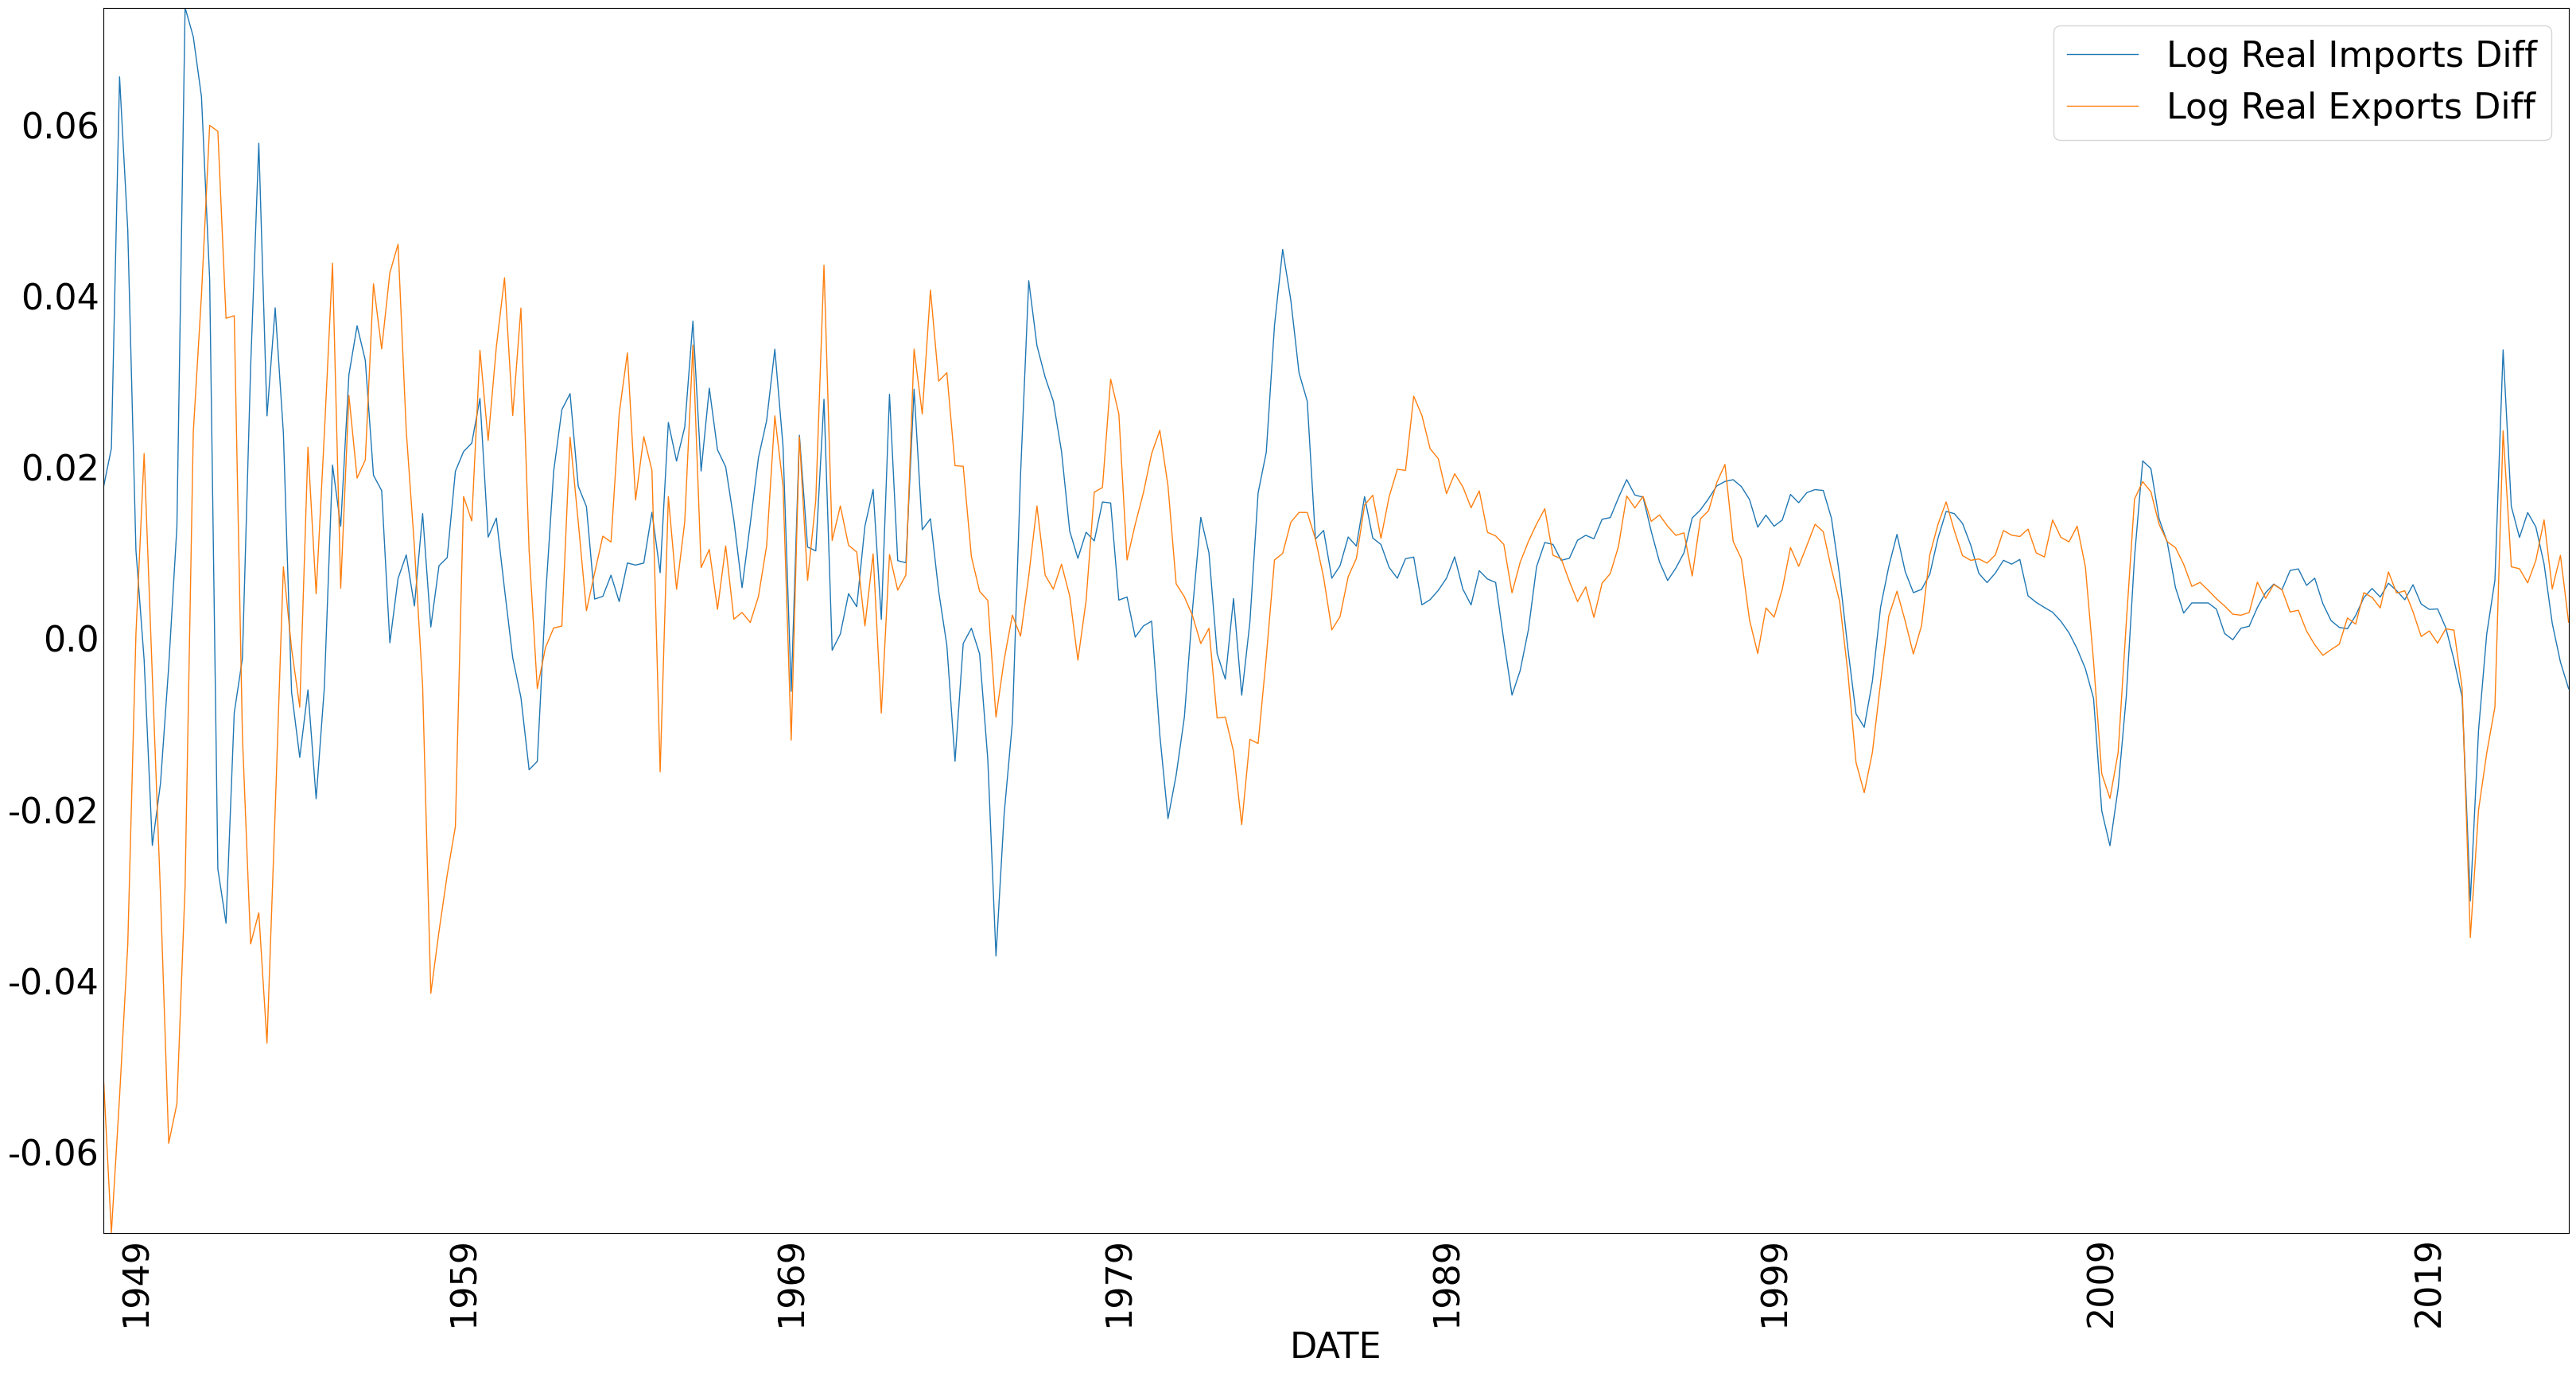

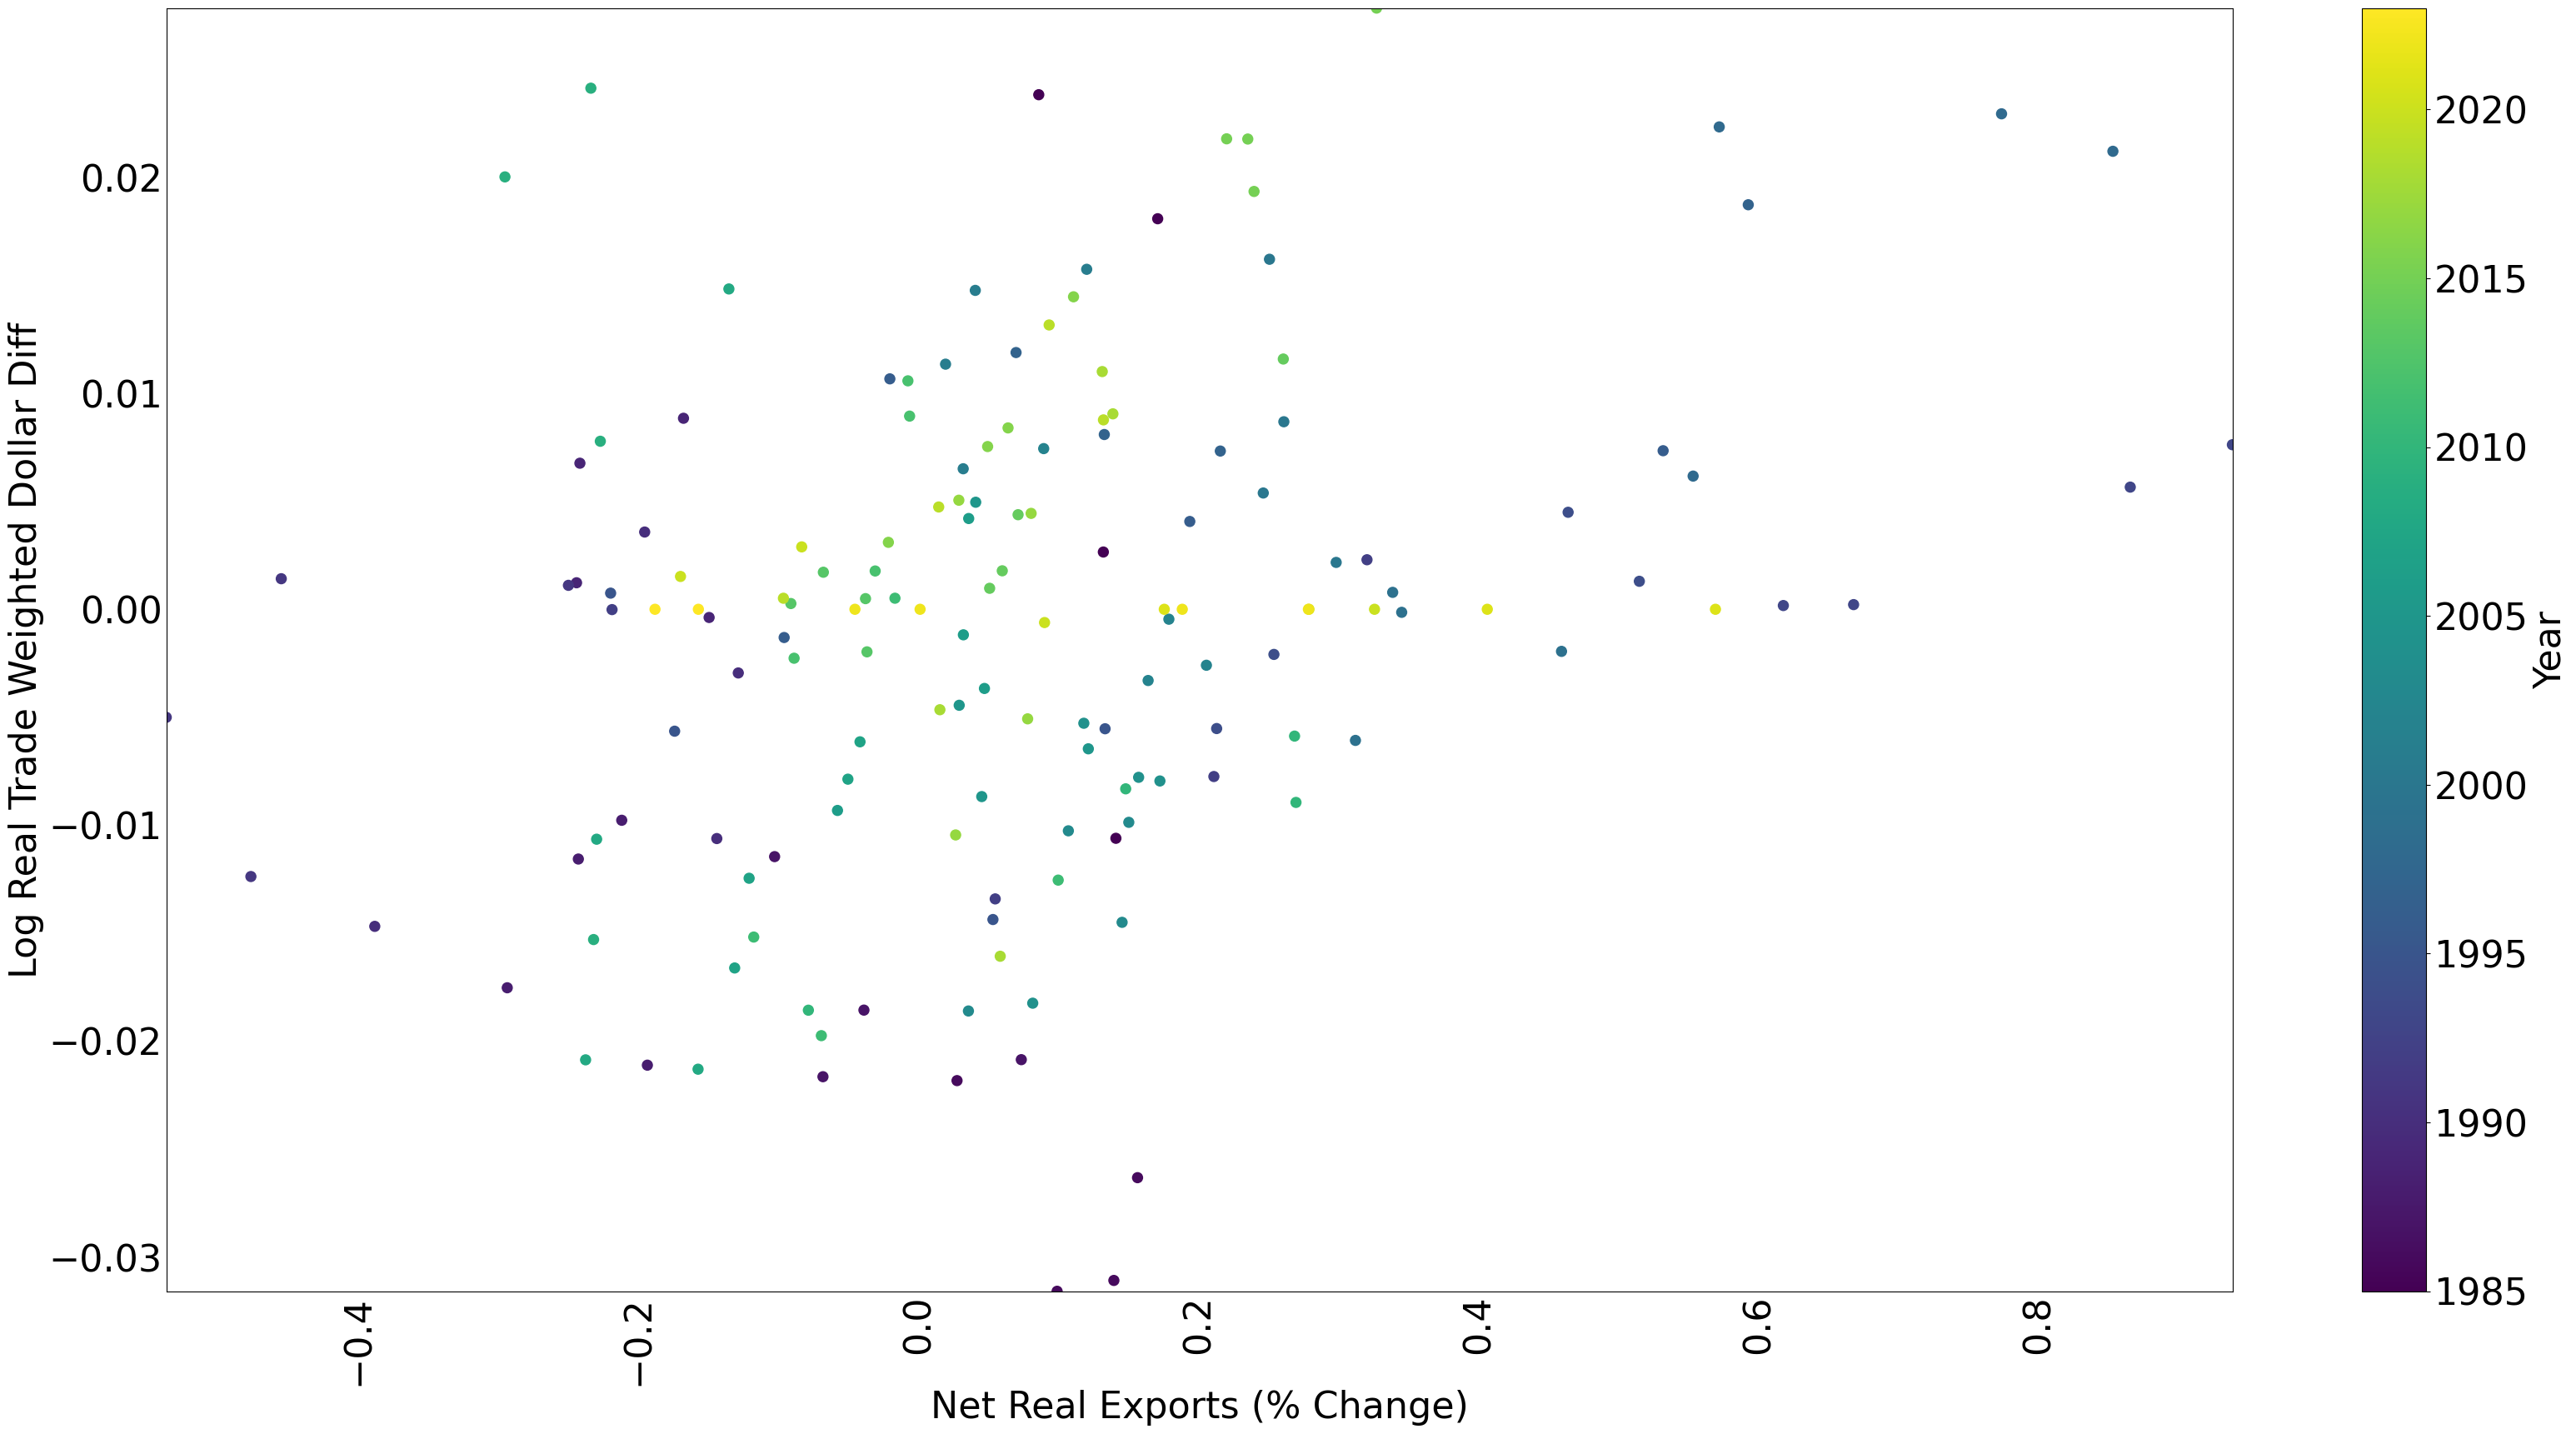

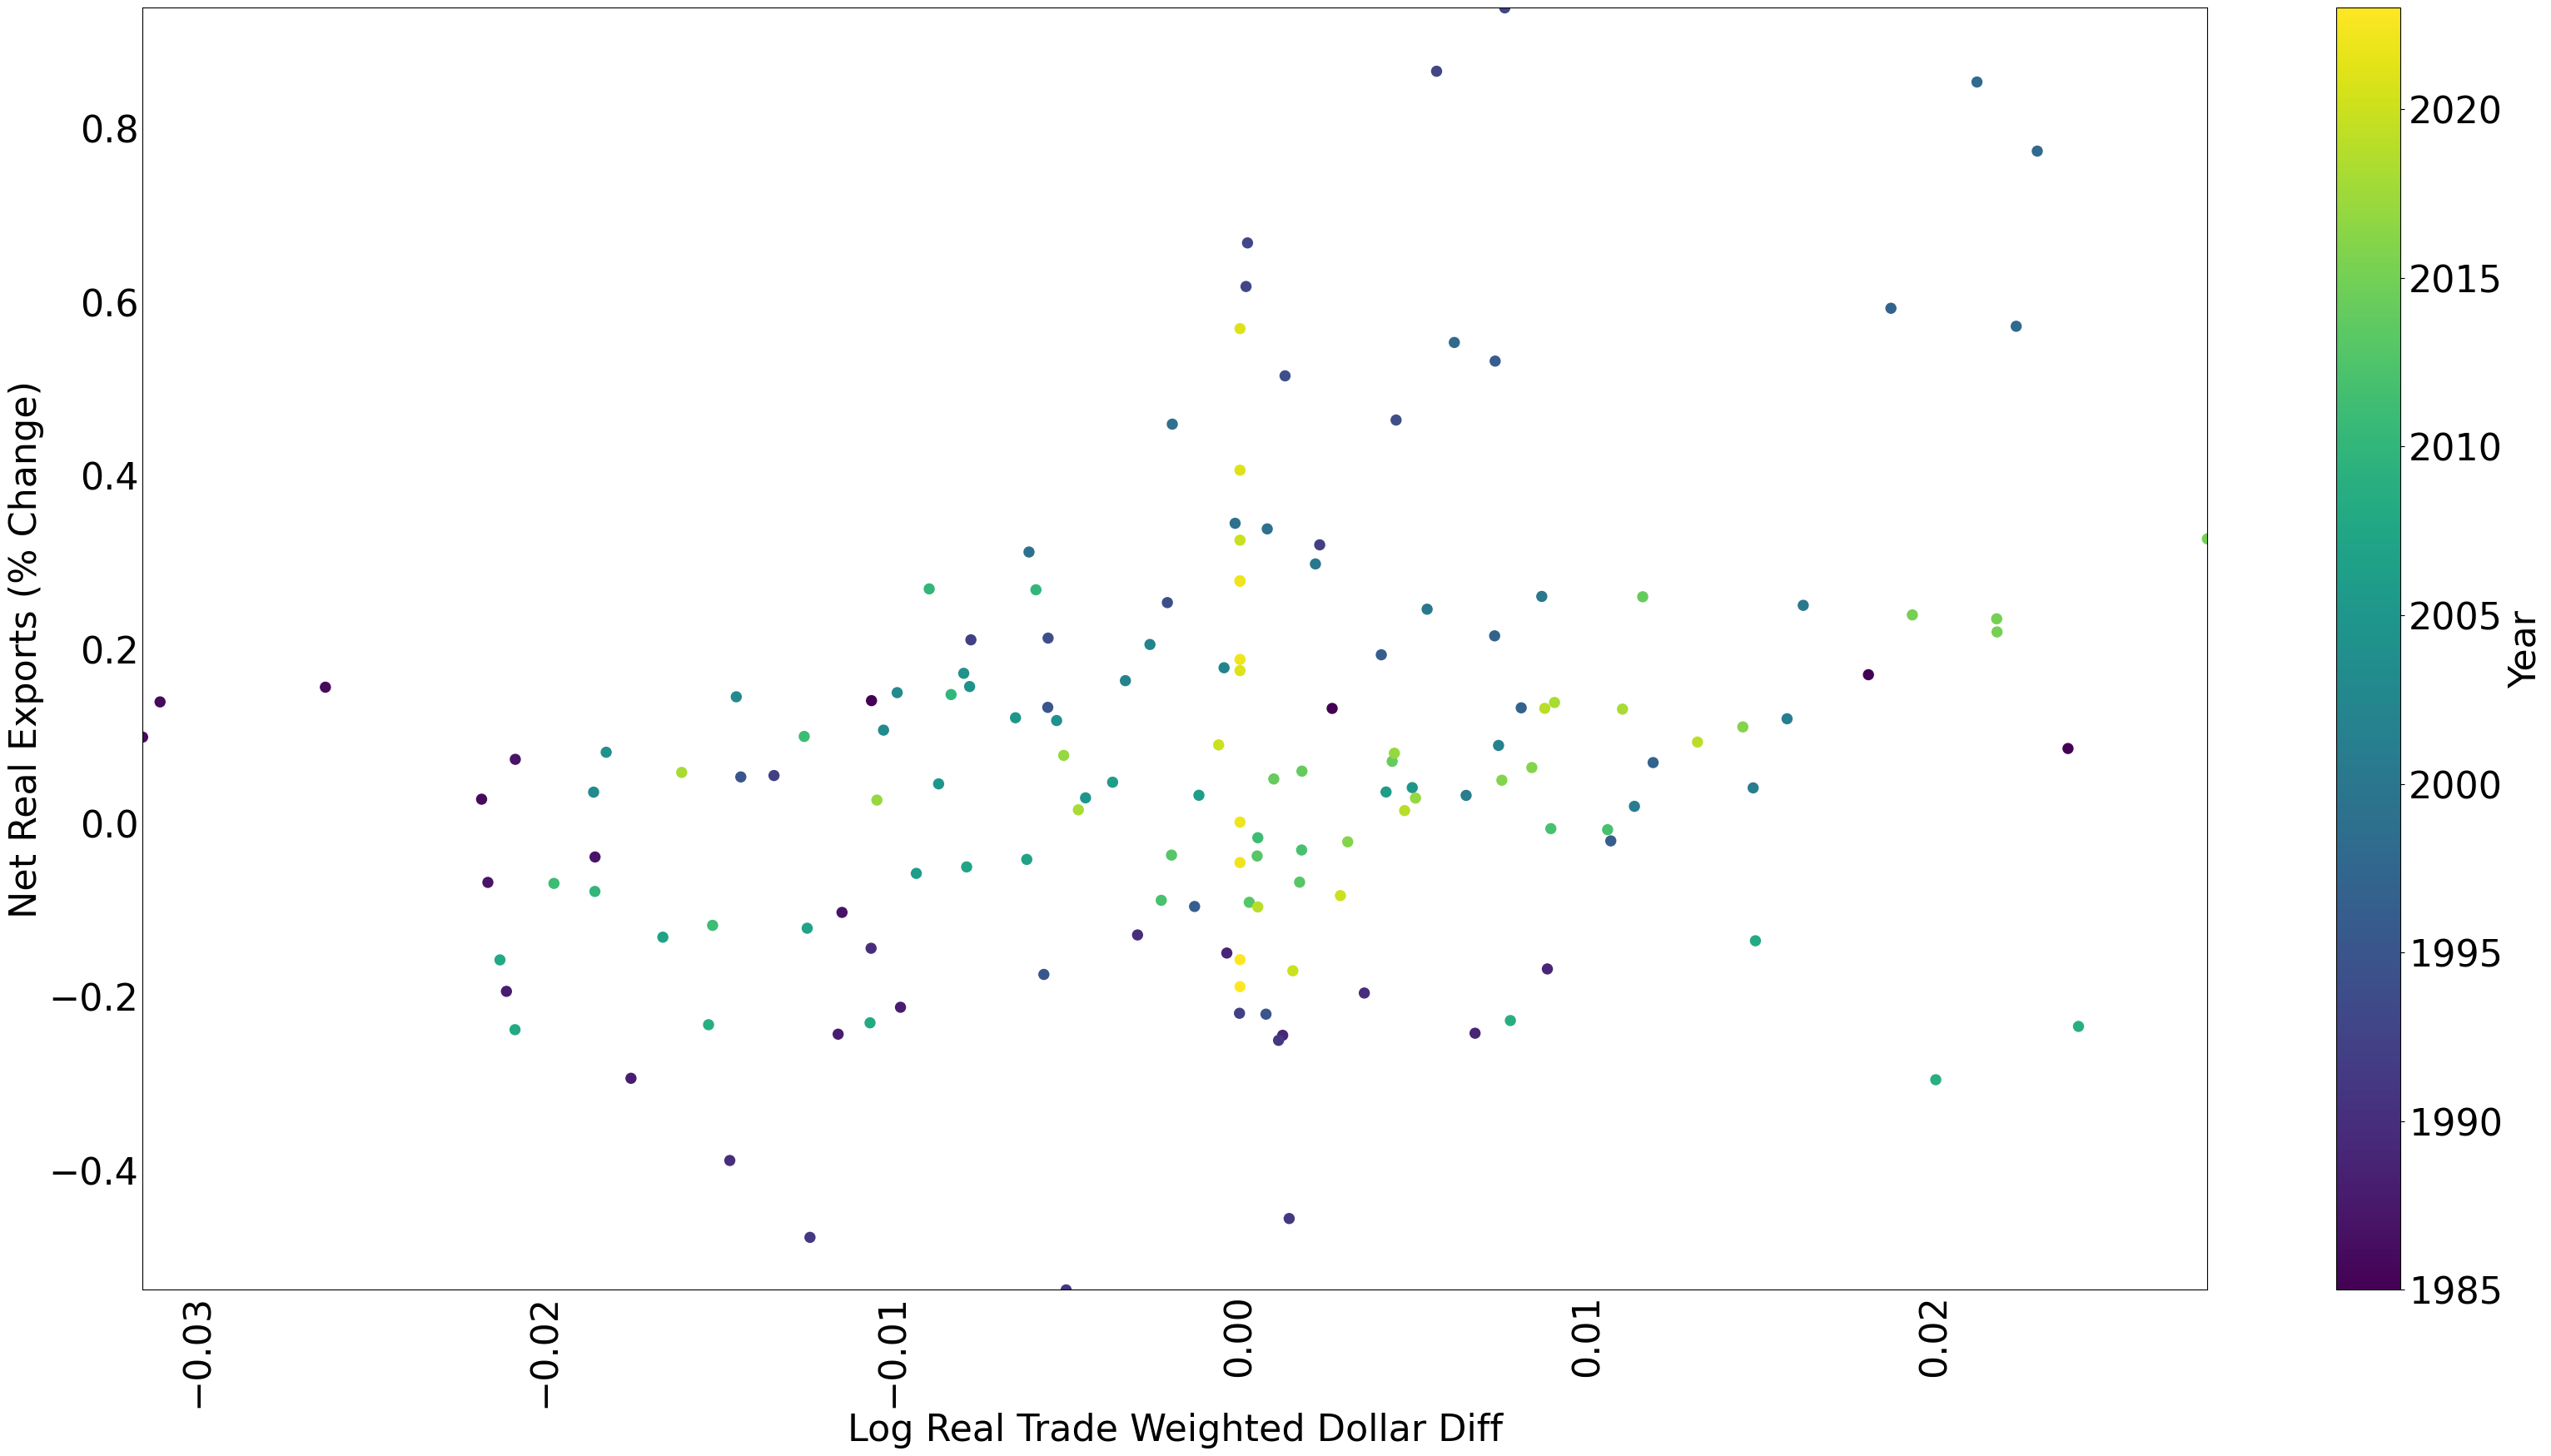

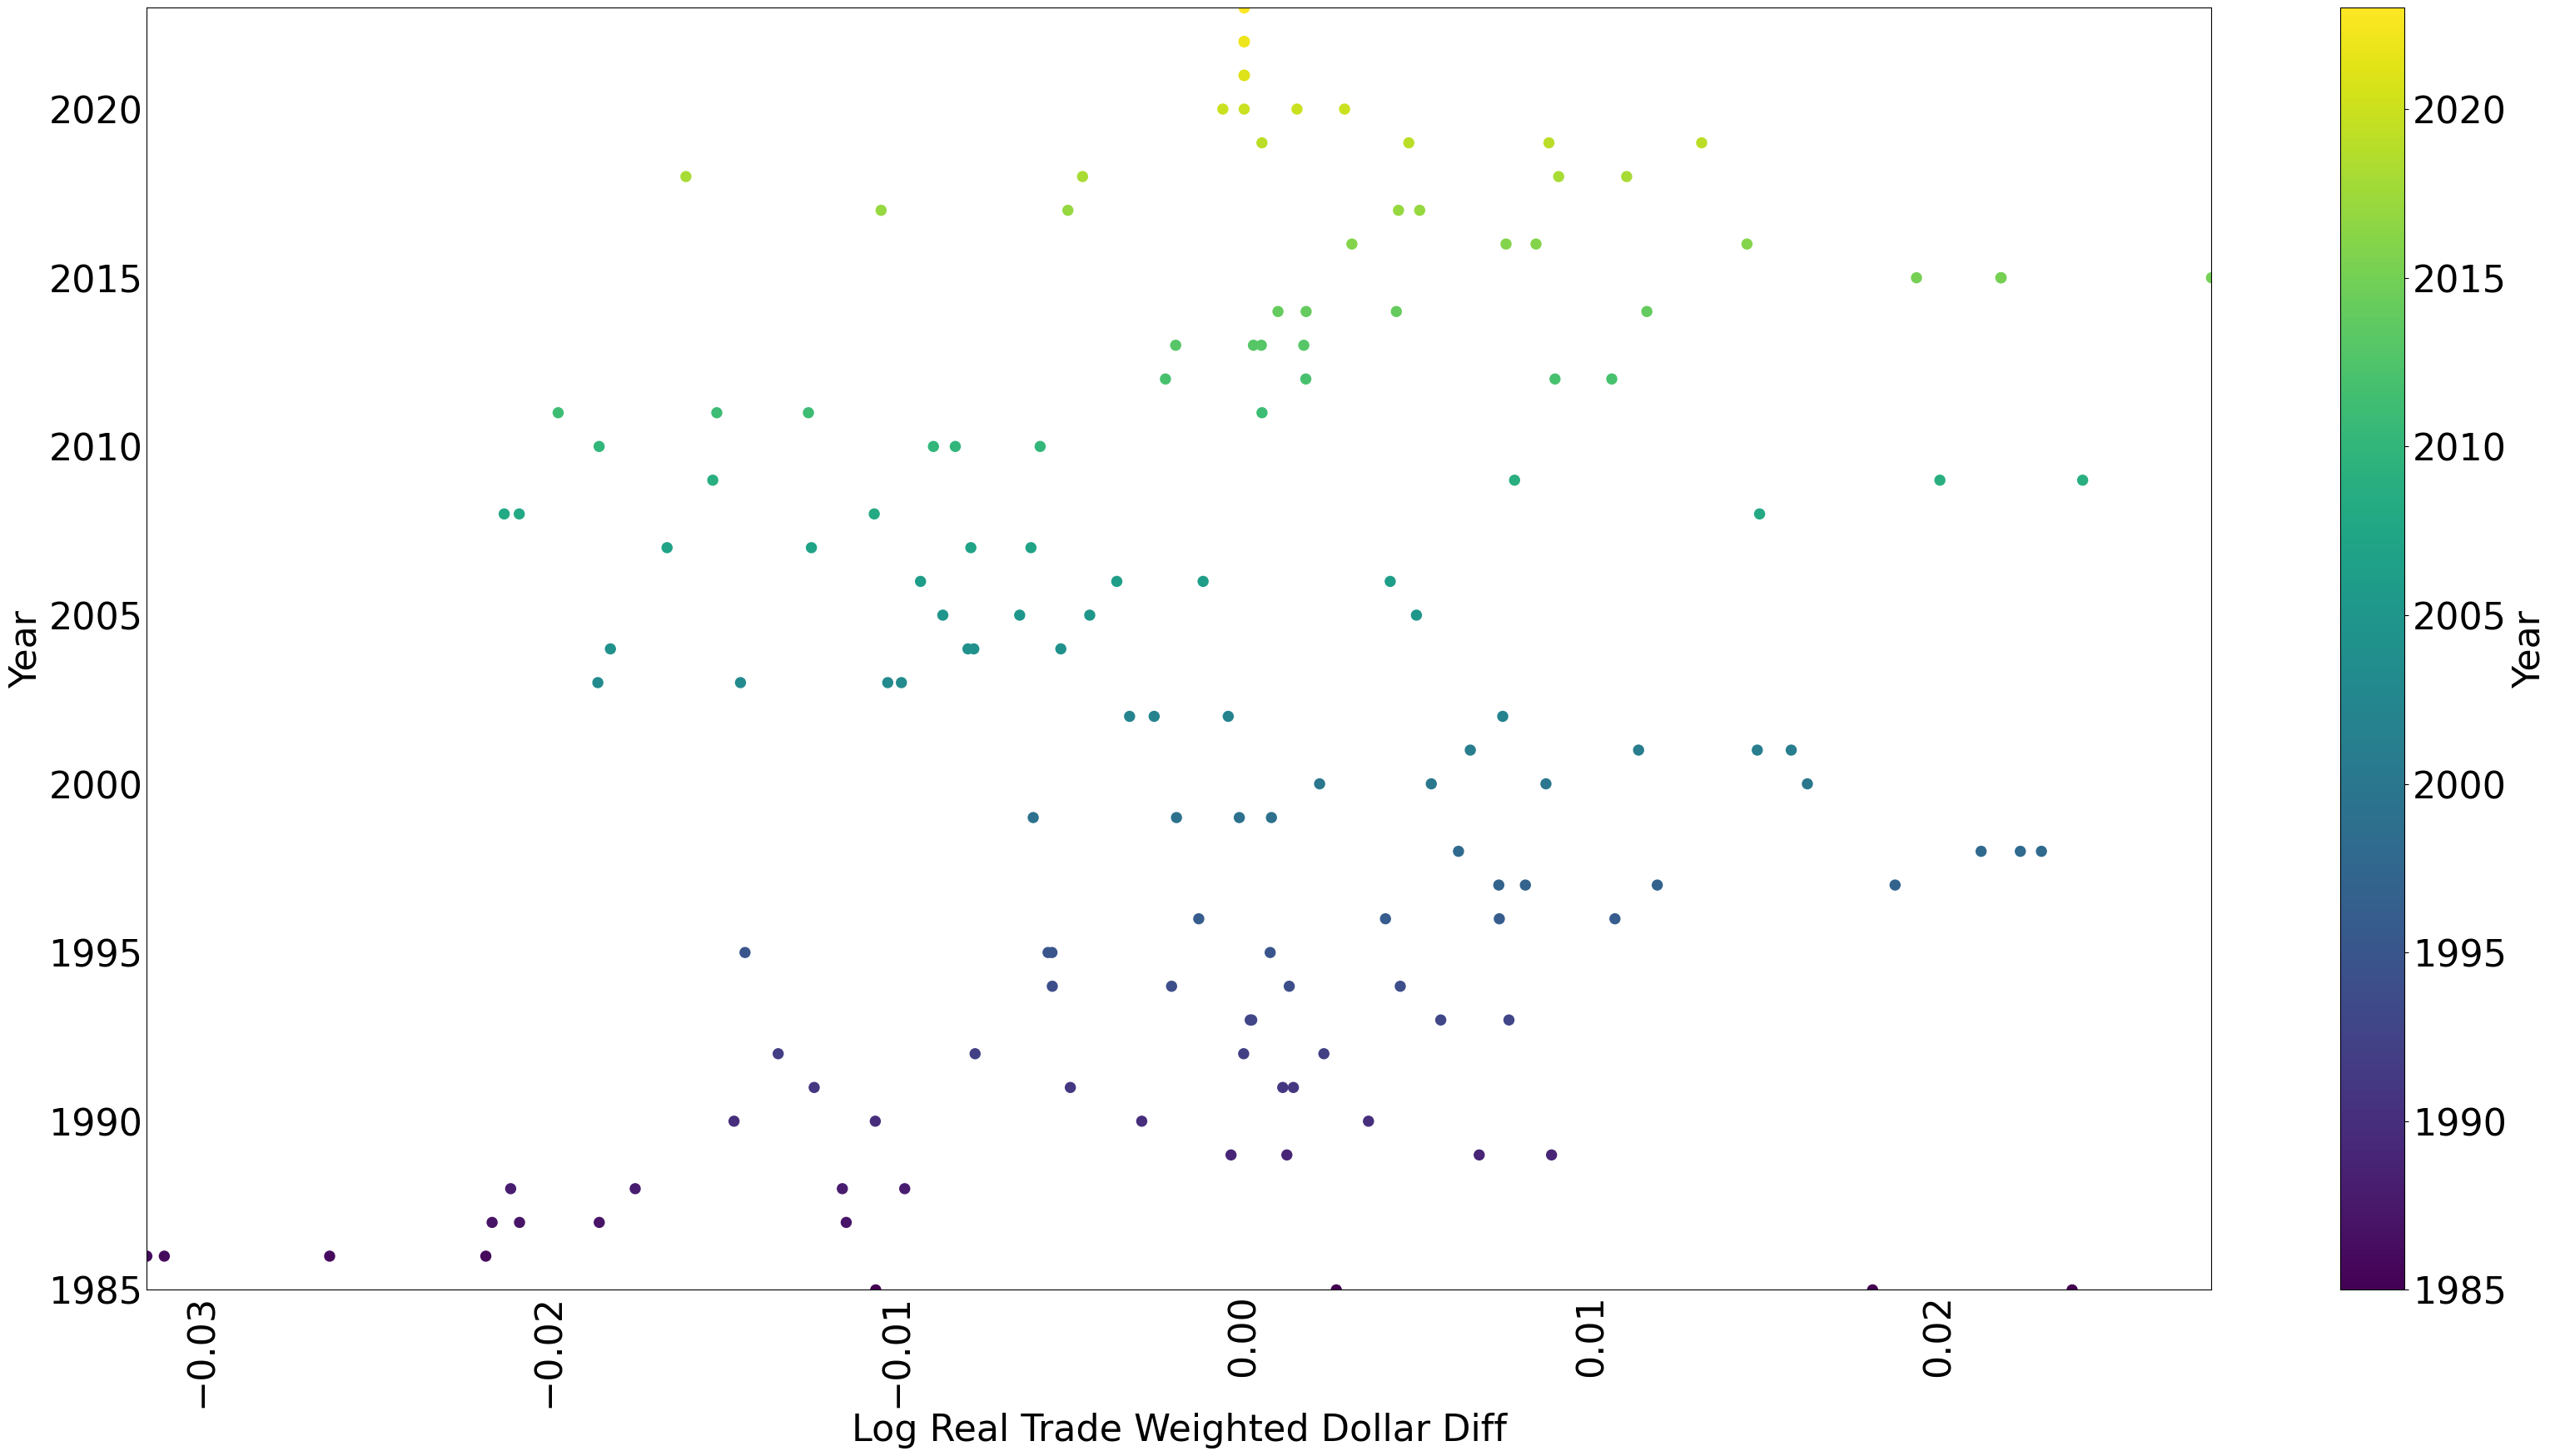

In [5]:
from datlib.plots import *
plt.rcParams.update({'font.size': 32})
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.xmargin'] = 0
plot_lines(data[["Log Real Imports Diff", "Log Real Exports Diff"]])

plot_scatter(data.loc["1985":][["Net Real Exports (% Change)", "Log Real Trade Weighted Dollar Diff"]])

5.	Are real imports and real exports positively or negatively correlated? Does your response change if the data analyzed is log levels or log differenced?

6.	Create a scatter plot of log differenced values for Net Real Exports and the Real Trade Weighted U.S. Dollar Index.  Do changes in the level of imports or the level of exports appearto be impacted by changes in the value of the dollar?

7.	Which do you think the data indicates is a more significant driver of the level of imports: real GDP or the value of the dollar as reflected by the Real Trade Weighted U.S. Dollar Index? How does reference to log values or differenced values impact your response? Defend your answer.